    A random walk is a process in which there is an equal chance of going up or down by a random number.
    
    General Equation : yt = C + yt–1 + ϵt
        yt - present value
        yt –1 - previous timestep
        ϵt - white noise (random number)
        C - constant (nonzero)
        
    yt is the value of the random walk process at time t, and ϵt is a random number at time t.
    
    If C = 0, then
        yt = yt –1 + ϵt
            At t = 0, y0 is 0 (white noise)
    the value at t = 1,
        y1 = y0 + ϵ1 
        y1 = 0 + ϵ1 => y1 = ϵ1
    the value at t = 2,
        y2 = y1 + ϵ2 
        y2 = ϵ1 + ϵ2

    A random walk is not-stationary.
        Meaning : Its mean and variance is not constant over time.
        
    To identify a random walk : 
        A series whose first difference is stationary and uncorrelated.
        
    A stationary process is one whose statistical properties do not change over time.
    
    For a stationary series, its mean, variance, and autocorrelation do not change over time.
    
    To achieve stationary series, we use transformation:
        A transformation is a mathematical operation applied to a time series in order to make it stationary.
    Differencing is a transformation technique that calculates the change from one timestep to another. This transformation is useful for stabilizing the mean.
    sApplying a log function to the series can stabilize its variance.
    
    Here is the first order differencing given below.

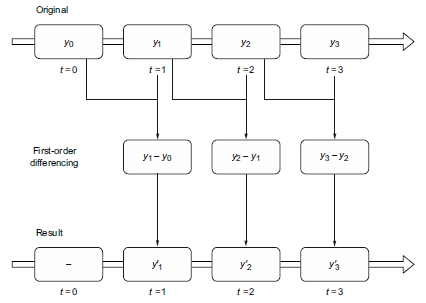

    Mostly we attain stationary series by applying first-order differencing.
    
    A time series that has been transformed, we must untransform it to return the results of the model to the original units of measurement. 
    The formal term for undoing a transformation is inverse transform.

    Testing for stationarity
        Augmented Dickey-Fuller (ADF) test
            Determine if a time series is stationary by testing for the presence of a unit root. 
            If a unit root is present, the time series is not stationary.
            
            Hypothesis : 
                        Ho : Series is not stationary
                        Ha : Series is Stationary
                We need "Reject Ho" for series to be stationary.

    Autocorrelation function (ACF)
        It's measures the linear relationship between lagged values of a time series.
        or measures the correlation of the time series with itself.

# GOOGL Random walk data

In [1]:
# Data Handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read csv file!
df = pd.read_csv('dataset/GOOGL.csv')

# Display the first 1st rows of 'df'
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-27,1292.000000,1294.099976,1265.060059,1270.859985,1270.859985,2209300
1,2020-04-28,1283.199951,1284.760010,1230.380005,1232.589966,1232.589966,4035000
2,2020-04-29,1345.000000,1360.150024,1326.729980,1342.180054,1342.180054,5417900
3,2020-04-30,1331.359985,1350.000000,1321.500000,1346.699951,1346.699951,2792100
4,2020-05-01,1324.089966,1351.430054,1309.660034,1317.319946,1317.319946,2443600


In [3]:
df.shape

(253, 7)

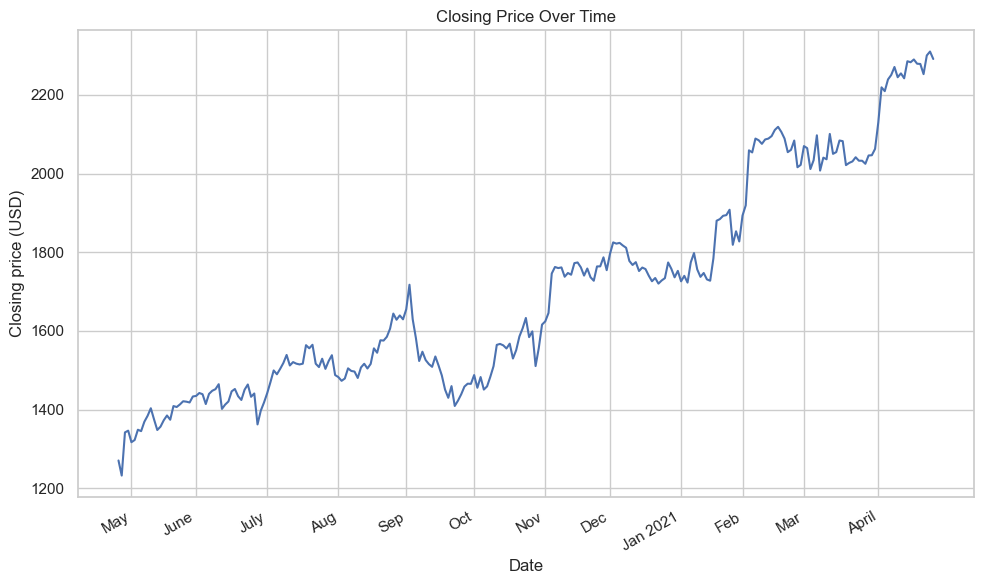

In [4]:
# Set Seaborn style
sns.set(style="whitegrid")

# Create the figure and axis using Seaborn's sns.lineplot
fig, ax = plt.subplots(figsize=(10, 6))

# Create the line plot
sns.lineplot(data=df, x='Date', y='Close', ax=ax)

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Closing price (USD)')
ax.set_title('Closing Price Over Time')

# Customize the x-axis tick positions and labels
x_ticks = [4, 24, 46, 68, 89, 110, 132, 152, 174, 193, 212, 235]
x_labels = ['May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan 2021', 'Feb', 'Mar', 'April']
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_labels, rotation=45, ha="right")

# Auto-format the x-axis date
fig.autofmt_xdate()

# Ensure a tight layout
plt.tight_layout()

plt.show()

In [5]:
# test for stationary

from statsmodels.tsa.stattools import adfuller

GOOGL_ADF_result = adfuller(df['Close'])

print(f'ADF Statistic: {GOOGL_ADF_result[0]}')
print(f'p-value: {GOOGL_ADF_result[1]}')

ADF Statistic: 0.1602504866477125
p-value: 0.9699419435913057


    Inference:
        ADF statistic is not a large negative number, and the p-value is greater than 0.05.
    
        Hence : time series is not stationary!
    
    Transformation of time series data to stationary by differencing techinque.

In [6]:
# 1st order differencing

diff_close = np.diff(df['Close'], n=1)

df_diff_close = pd.DataFrame({'diff_close' : diff_close})

In [7]:
# Check whether 1st order is stationary or not!

GOOGL_diff_ADF_result = adfuller(diff_close)

print(f'ADF Statistic: {GOOGL_diff_ADF_result[0]}')
print(f'p-value: {GOOGL_diff_ADF_result[1]}')

ADF Statistic: -5.303439704295229
p-value: 5.386530961454689e-06


    Inference:
        ADF statistic is not a large negative number, and the p-value is smaller than 0.05.

        Hence : time series is stationary!

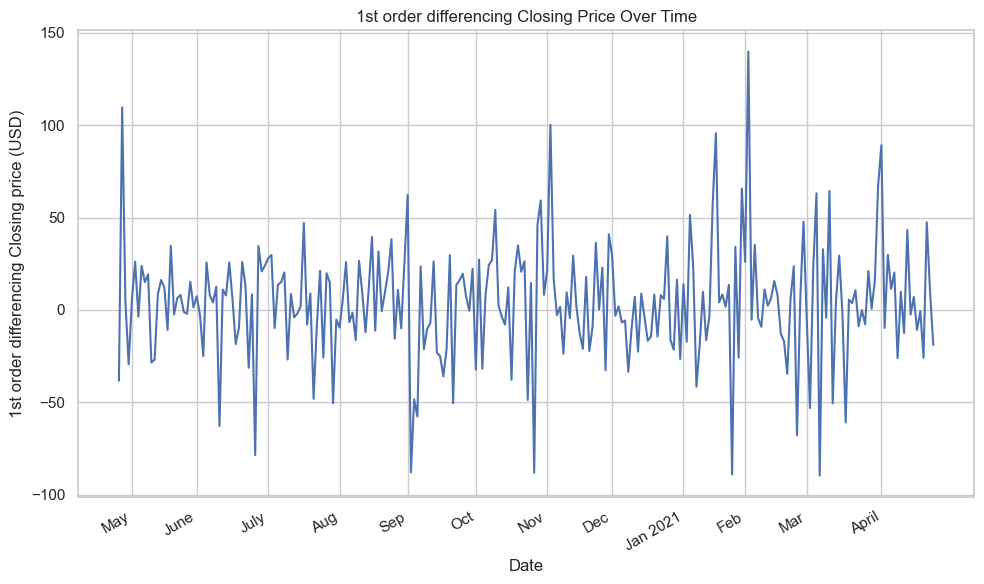

In [8]:
# Set Seaborn style
sns.set(style="whitegrid")

# Create the figure and axis using Seaborn's sns.lineplot
fig, ax = plt.subplots(figsize=(10, 6))

# Create the line plot
sns.lineplot(data=df, x='Date', y=df_diff_close['diff_close'], ax=ax)

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('1st order differencing Closing price (USD)')
ax.set_title('1st order differencing Closing Price Over Time')

# Customize the x-axis tick positions and labels
x_ticks = [4, 24, 46, 68, 89, 110, 132, 152, 174, 193, 212, 235]
x_labels = ['May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan 2021', 'Feb', 'Mar', 'April']
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_labels, rotation=45, ha="right")

# Auto-format the x-axis date
fig.autofmt_xdate()

# Ensure a tight layout
plt.tight_layout()

plt.show()

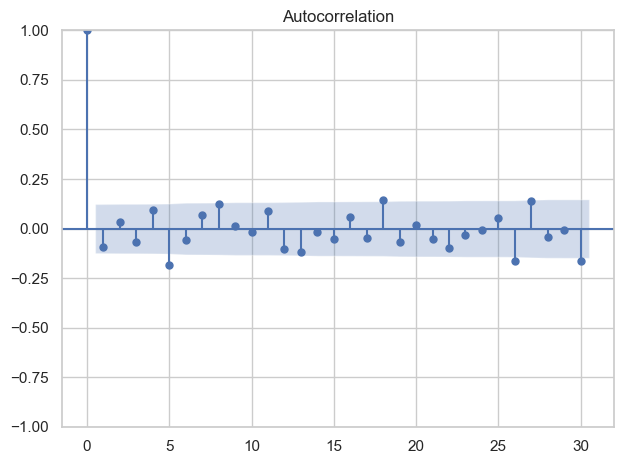

In [9]:
from statsmodels.graphics.tsaplots import plot_acf

#Plot the ACF of the differenced series.
plot_acf(df_diff_close['diff_close'], lags=30);

plt.tight_layout()

    Inference:
        From the above ACF plot, there are no significant coefficients.
        
        We notice at lags 5 and 18 the coefficients are significant.(these point is not significant)
        
        Because we need to have consecutive significant between the lag.

In [10]:
# Spliting the data into train and test data

train = df_diff_close[:int(0.9*len(df_diff_close))]
test = df_diff_close[int(0.9*len(df_diff_close)):]

In [11]:
train.shape,test.shape

((226, 1), (26, 1))

# Forecasting on a long horizon

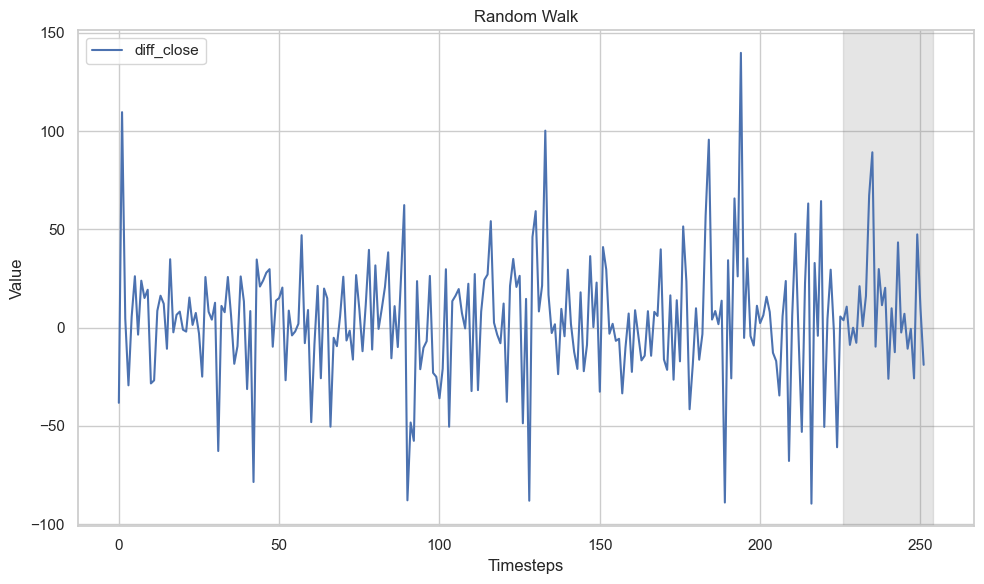

In [12]:
# Set Seaborn style
sns.set(style="whitegrid")

# Create the figure and axis using Seaborn's sns.lineplot
fig, ax = plt.subplots(figsize=(10, 6))

# Create the line plot
sns.lineplot(data=df_diff_close, ax=ax)

# Set labels and title
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')
ax.set_title('Random Walk')

# Add a shaded region using Seaborn's axvspan
ax.axvspan(226, 254, color='#808080', alpha=0.2)

# Ensure a tight layout
plt.tight_layout()

# Show the plot (optional)
plt.show()

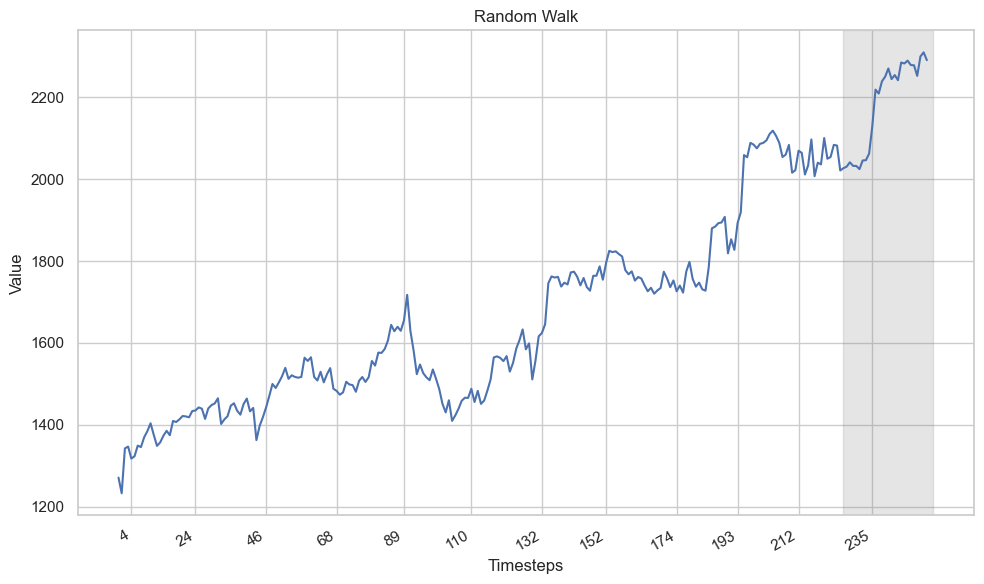

In [13]:
# Set Seaborn style
sns.set(style="whitegrid")

# Create the figure and axis using Seaborn's sns.lineplot
fig, ax = plt.subplots(figsize=(10, 6))

# Create the line plot
sns.lineplot(data=df, x='Date', y='Close', ax=ax)

# Set labels and title
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')
ax.set_title('Random Walk')

# Add a shaded region using Seaborn's axvspan
ax.axvspan(226, 254, color='#808080', alpha=0.2)

# Customize the x-axis tick positions and labels
x_ticks = [4, 24, 46, 68, 89, 110, 132, 152, 174, 193, 212, 235]
x_labels = ['4', '24', '46', '68', '89', '110', '132', '152', '174', '193', '212', '235']
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_labels)

# Auto-format the x-axis date
fig.autofmt_xdate()

# Ensure a tight layout
plt.tight_layout()

plt.show()